# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [63]:
%matplotlib inline
from sklearn import datasets
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [64]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [65]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
# we only take the first two features. 
x_try = iris.data[:,:2]
print(x_try.shape)
y_try = iris.target
print(y_try.shape)

(150, 2)
(150,)


In [67]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pds.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [68]:
print("target names:" + str(iris.target_names))

target names:['setosa' 'versicolor' 'virginica']


In [69]:
#建立Target欄位與資料
y = pds.DataFrame(iris.target, columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [70]:
#合併資料特徵欄位與目標欄位
iris_data = pds.concat([x, y], axis = 1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [71]:
iris_data_2 = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data_2.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [104]:
#只選擇目標為0與1的資料
iris_data_3 = iris_data_2[iris_data_2['target'].isin([0, 1])]
print(iris_data_3.shape)
iris_data_3
# print(iris.data.size/len(iris.feature_names))

(100, 3)
150.0


## 切分訓練集與測試集
> train_test_split()

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data_3[['sepal length (cm)', 'petal length (cm)']], iris_data_3['target'], test_size = 0.3)

In [74]:
X_train.head()
X_train.shape

(70, 2)

In [94]:
np.max(X_train)

6.9

In [75]:
X_test.head()
X_test.shape

(30, 2)

In [76]:
Y_train.head()

0     0
69    1
6     0
28    0
84    1
Name: target, dtype: int32

In [77]:
Y_test.head()

67    1
71    1
23    0
90    1
85    1
Name: target, dtype: int32

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [106]:
def norm_stats(dfs):
    # 報告老師，計算最大值、最小值，平均數、如果不加 axis = 0 計算結果是兩個欄位(columns)混合後的 max / min / mean，計算 z-score 的時候就會出錯
    minimum = np.min(dfs, axis = 0)
    maximum = np.max(dfs, axis = 0)
    mu = np.mean(dfs, axis = 0)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, std = stats
    df = pds.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/std[c]
    return df

In [114]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train[0:10,:]
arr_y_train = np.array(y_train)
# arr_x_train[:5]

## use sklearn

In [119]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc_train.mean_)  #mean
print(sc_train.scale_) #standard deviation

[5.43       2.82714286]
[0.64527956 1.44250986]


In [120]:
#transform: (x-u)/std.
X_train_std = sc_train.transform(X_train)
X_train_std[:5]

array([[-0.51140625, -0.98934704],
       [ 0.2634517 ,  0.74374337],
       [-1.2862642 , -0.98934704],
       [-0.35643466, -0.98934704],
       [-0.04649148,  1.15968507]])

In [121]:
sc_test = StandardScaler().fit(X_test)  #Compute the statistics to be used for later scaling.
print(sc_test.mean_)  #mean
print(sc_test.scale_) #standard deviation

[5.56666667 2.94      ]
[0.61173705 1.43865678]


In [122]:
X_test_std = sc_test.transform(X_test)
X_test_std[:5]

array([[ 0.3814275 ,  0.80630767],
       [ 0.87183428,  0.73679839],
       [-0.762855  , -0.8619151 ],
       [-0.10897929,  1.01483552],
       [ 0.70836535,  1.0843448 ]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

you can also use fit_transform method (i.e., fit and then transform)    

In [125]:
X_train_std_2 = sc.fit_transform(X_train)  
X_test_std_2 = sc.fit_transform(X_test)
print(X_test_std_2[:10])

[[ 0.3814275   0.80630767]
 [ 0.87183428  0.73679839]
 [-0.762855   -0.8619151 ]
 [-0.10897929  1.01483552]
 [ 0.70836535  1.0843448 ]
 [ 0.05448964  1.0843448 ]
 [ 1.85264785  1.43189121]
 [ 0.3814275  -1.20946151]
 [ 2.34305463  1.22336336]
 [-0.10897929  0.59777983]]


In [126]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())
print('mean of X_test_std:',np.round(X_test_std.mean(),4))
print('std of X_test_std:',X_test_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0
mean of X_test_std: -0.0
std of X_test_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.82540563104856
30.199963698174773


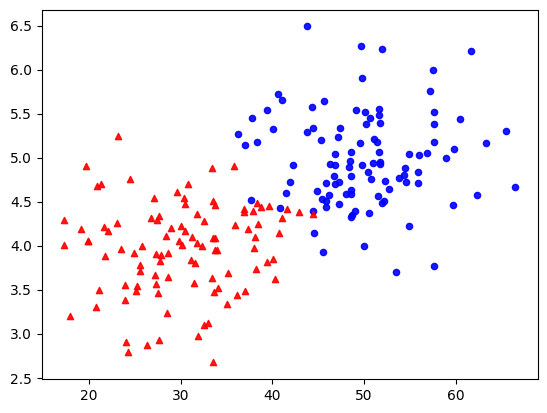

In [132]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='o',s=20,alpha=0.9)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.9)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [162]:
x_val = np.concatenate([x1, x2])
y_val = np.concatenate([y1, y2])
x_val.shape

(200,)

In [163]:
x_val[:10]

array([49.76693452, 51.49628575, 51.70785044, 40.02100856, 54.93181104,
       45.83974247, 54.60972137, 46.68534381, 47.30847206, 47.17729912])

In [164]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [165]:
minmax_norm(x_val[:10])

array([0.65361512, 0.76959488, 0.78378356, 0.        , 1.        ,
       0.39023613, 0.9783989 , 0.44694679, 0.48873718, 0.47994   ])

In [166]:
from sklearn.preprocessing import MinMaxScalar
print(x_val.shape)
x_val=x_val.reshape(-1, 1)
#print(x_val[0:10,:])
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
[[49.76693452]
 [51.49628575]
 [51.70785044]
 [40.02100856]
 [54.93181104]
 [45.83974247]
 [54.60972137]
 [46.68534381]
 [47.30847206]
 [47.17729912]]
[66.4780016]
[[0.66031443]
 [0.69546693]
 [0.6997674 ]
 [0.46220917]
 [0.76530079]
 [0.58048647]
 [0.75875368]
 [0.59767499]
 [0.61034131]
 [0.60767496]]
